In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Capstone/Cellphone

/content/drive/MyDrive/Colab Notebooks/Capstone/Cellphone


In [3]:
!ls

Cellphone.csv  Cellphone.xlsx  DataForML.pkl  Final_XGB_Model.pkl


In [4]:
#ignoring the warning messages
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Reading the dataset
import pandas as pd
import numpy as np
CellphoneData=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/Cellphone/Cellphone.csv', encoding='latin')
print('Shape before deleting duplicate values:', CellphoneData.shape)

# Removing duplicate rows (none exist)
CellphoneData=CellphoneData.drop_duplicates()
print('Shape After deleting duplicate values:', CellphoneData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
CellphoneData.head(10)


Shape before deleting duplicate values: (161, 14)
Shape After deleting duplicate values: (161, 14)


,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
5,947,2137,12,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
6,774,1238,13,134.1,4.0,233,2,1.20,8.0,1.000,2.00,0.0,1560,11.7
7,947,2137,13,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
8,99,1315,14,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
9,1103,2580,15,145.0,5.1,432,4,2.50,16.0,2.000,16.00,2.0,2800,8.1


In [ ]:
#Key observations

This file contains the details from 162 cellphones

There are 14 attributes and they are outlined below:


Product_id - A unique ID given to each cellphone
Price - The price of the cellphone. The currency is not specified so we will assume $AUD
Sale - The number of cellphones sold
weight - The weight of the cellphone. We can assume the weight is in grams
resoloution - The screen resolution of the cellphone's display indicating the number of pixels in each dimension (e.g., 1920x1080)
ppi - The number of pixels per square inch of the cellphone's display
cpu core - The number of processing cores in the cellphone's central processing unit (CPU)
cpu freq - The clock speed of the CPU, we can assume it is measured in gigahertz (GHz), indicating how many cycles per second the CPU can execute
internal mem: The amount of built-in storage capacity in the cellphone, we can assume it is measured in gigabytes (GB)
ram - Random Access Memory. The amount of memory available for running applications and processes in real-time, we can assume it is measured in gigabytes (GB)
RearCam - The resolution or quality of the primary camera on the back of the cellphone, we can assume it is measured in megapixels
Front_Cam - The resolution or quality of the secondary camera on the front of the cellphone, we can assume it is measured in megapixels
battery - The capacity of the cellphone's battery. We can assume it is measured in milliampere-hours (mAh)
thickness - The thickness of the cellphone. We can assume it is measured in millimeters (mm)

SyntaxError: unterminated string literal (detected at line 12) (<ipython-input-7-2316f39f2a11>, line 12)

In [7]:
#Problem Statement Definition
Creating  a prediction model to predict the price(Price) of a Cellphone
Target Variables: Product_id, Price, Sale, weight, resoloution, ppi, cpu core, cpu freq, internal mem, ram, RearCam, Front_Cam, battery, thickness

#Problem Statement
In the competitive mobile phone market companies are seeking to understand the sales data of mobile phones and what factors influence their prices.
The objective is to discover a relation between mobile phone features such as RAM, resolution and memory and its selling price.

SyntaxError: invalid syntax (<ipython-input-7-f3d07977e76c>, line 2)

In [ ]:
#Choosing the appropriate ML/AI Algorithm for Data Analysis.
Since the target variable is Continuous, we need to create a supervised ML Regression model


<Axes: >

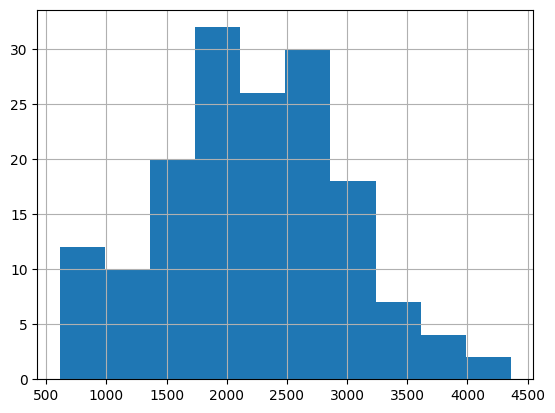

In [10]:
%matplotlib inline
# Creating a histogram because the Target variable is Continuous
# This will help us to understand Price values and their distribution
CellphoneData['Price'].hist()

In [ ]:
#Step 4 Observations:
The data distribution of the target variable is satisfactory to proceed further.
There are sufficient number of rows for each type of values to learn from.

In [ ]:
#Step 5 Basic Exploratory Data Analysis

In [11]:
# Looking at sample rows in the data
CellphoneData.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [12]:
# Looking at sample rows in the data
CellphoneData.tail()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.0,20.0,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
160,1131,2536,9807,202.0,6.00,367,8,1.500,16.0,3.0,21.5,16.0,2700,8.4


In [13]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
CellphoneData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [14]:
# Looking at the descriptive statistics of the data
CellphoneData.describe(include='all')

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [15]:
# Finding unique values for each column in order to understand which column is categorical and which is Continuous
CellphoneData.nunique()

Product_id       83
Price            81
Sale            125
weight           62
resoloution      24
ppi              45
cpu core          6
cpu freq         28
internal mem     10
ram              12
RearCam          18
Front_Cam        15
battery          55
thickness        49
dtype: int64

In [16]:
# Plotting multiple bar charts at once for categorical variables
# Defining custom function to plot bar charts for multiple columns at once

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

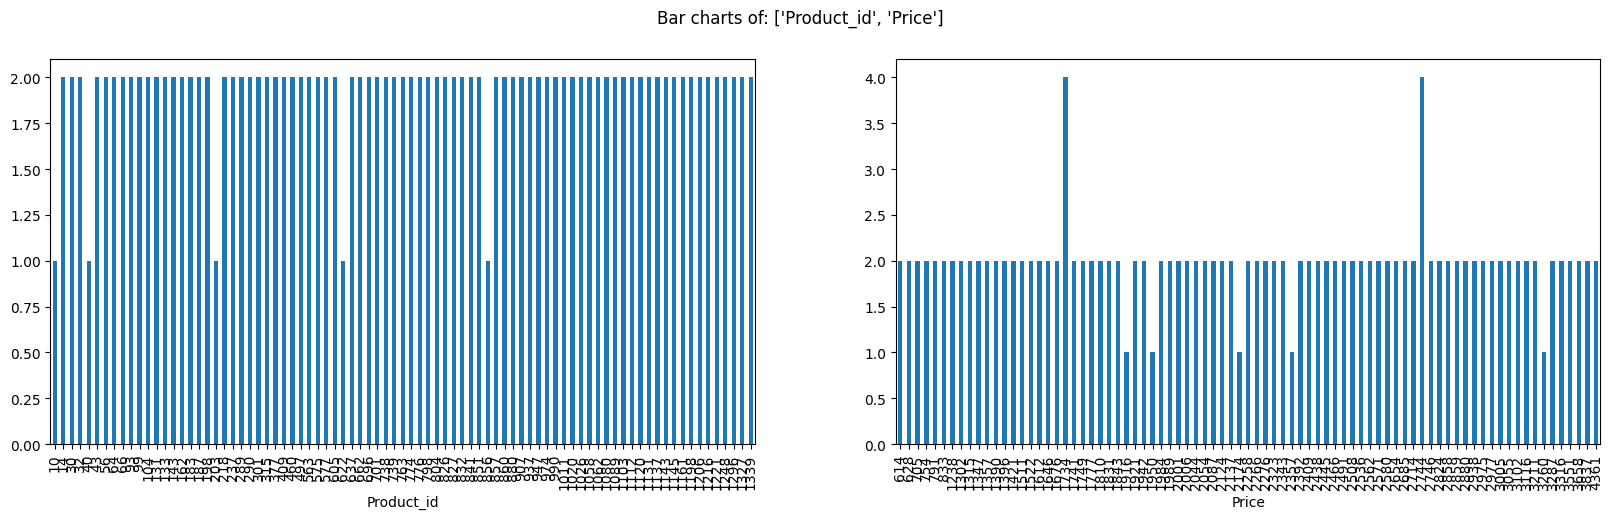

In [17]:
# Calling the function PlotBarCharts()
PlotBarCharts(inpData=CellphoneData, colsToPlot=['Product_id','Price'])

array([[<Axes: title={'center': 'Product_id'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Sale'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'resoloution'}>,
        <Axes: title={'center': 'ppi'}>,
        <Axes: title={'center': 'cpu core'}>,
        <Axes: title={'center': 'cpu freq'}>],
       [<Axes: title={'center': 'internal mem'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'RearCam'}>,
        <Axes: title={'center': 'Front_Cam'}>],
       [<Axes: title={'center': 'battery'}>,
        <Axes: title={'center': 'thickness'}>, <Axes: >, <Axes: >]],
      dtype=object)

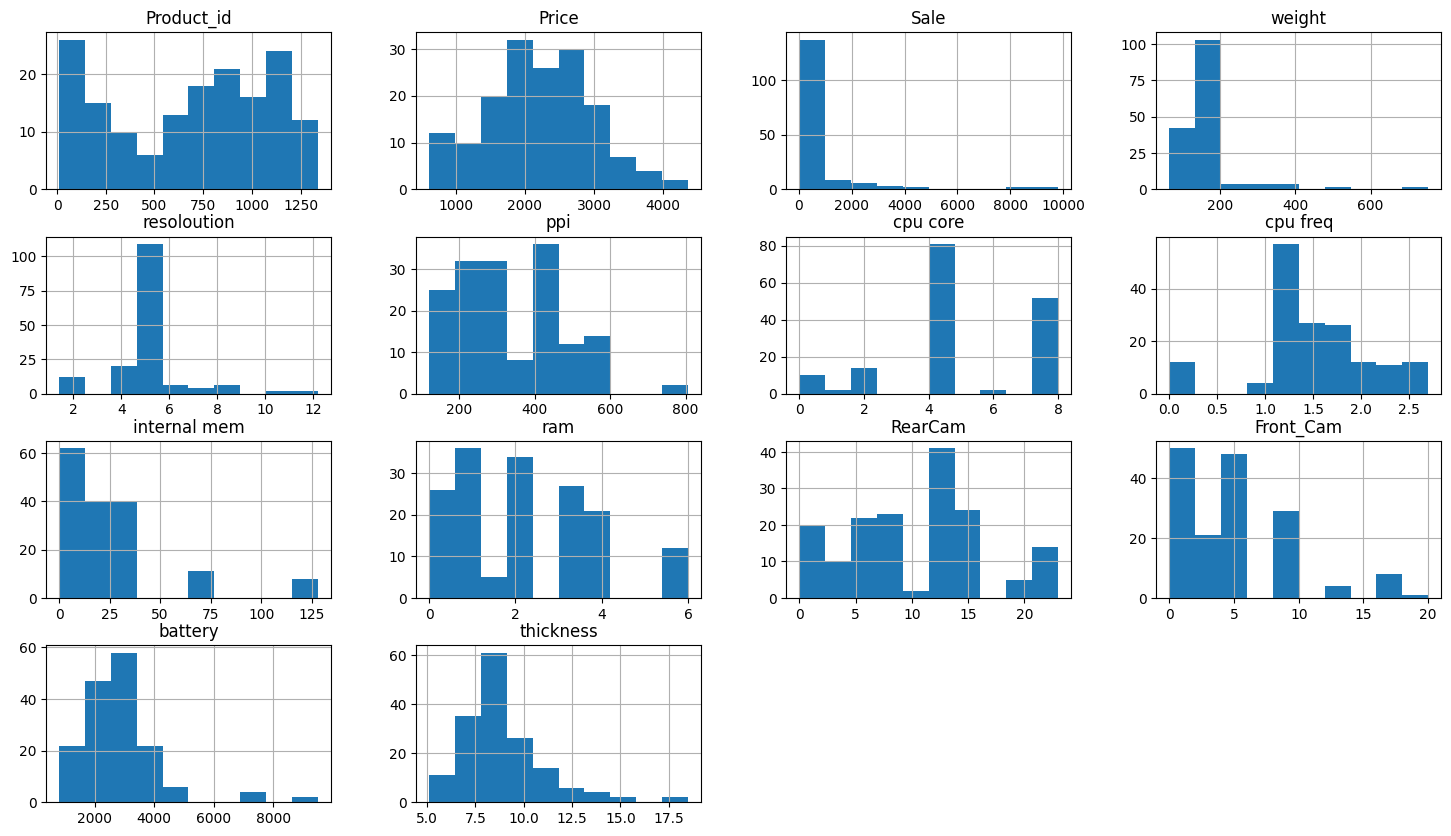

In [18]:
# Plotting histograms of multiple columns together
CellphoneData.hist(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq',
                 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'], figsize=(18,10))

In [19]:
#Replacing outliers for 'Sale'
# Finding nearest values to 60 mark
CellphoneData['Sale'][CellphoneData['Sale']<60].sort_values(ascending=False)

60    58
59    57
58    57
57    57
56    52
      ..
4     11
3     11
2     10
1     10
0     10
Name: Sale, Length: 61, dtype: int64

In [20]:
# Replacing outliers with nearest possibe value
CellphoneData['Sale'][CellphoneData['Sale']>60] =51.13

array([[<Axes: title={'center': 'Price'}>]], dtype=object)

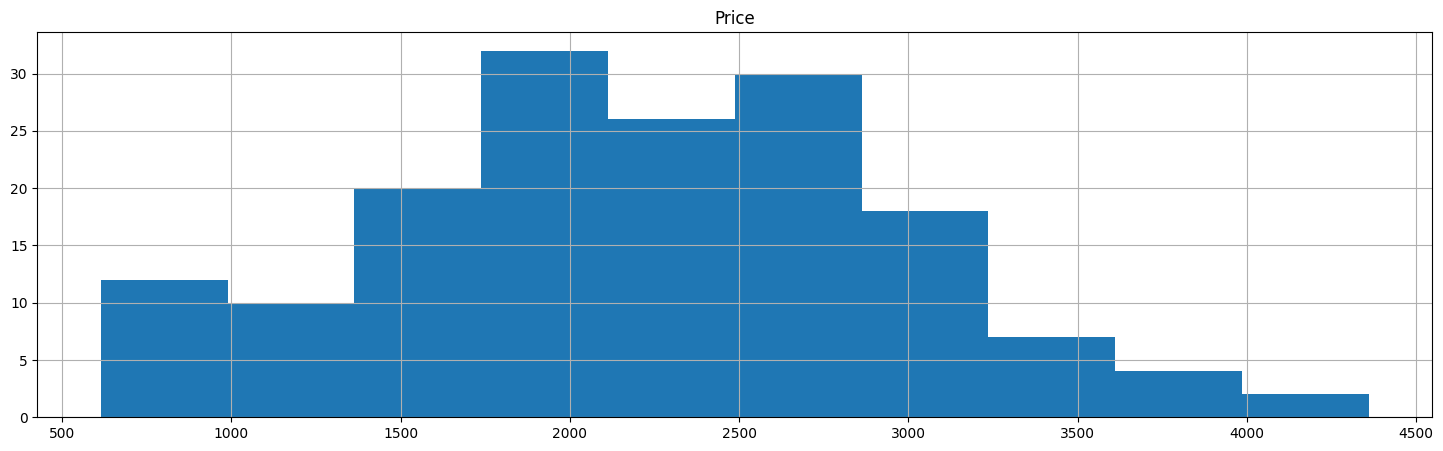

In [21]:
#Step 11:Visualising Data Distribution after outlier removal
CellphoneData.hist(['Price'], figsize=(18,5))

In [ ]:
#Observation from Step 11
The distribution has remained largely similar after the outlier treatment

In [22]:
#Step 12: Missing Values Analysis
CellphoneData.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [ ]:
No missing values in the data
Therefore no removal of data samples(rows) is required

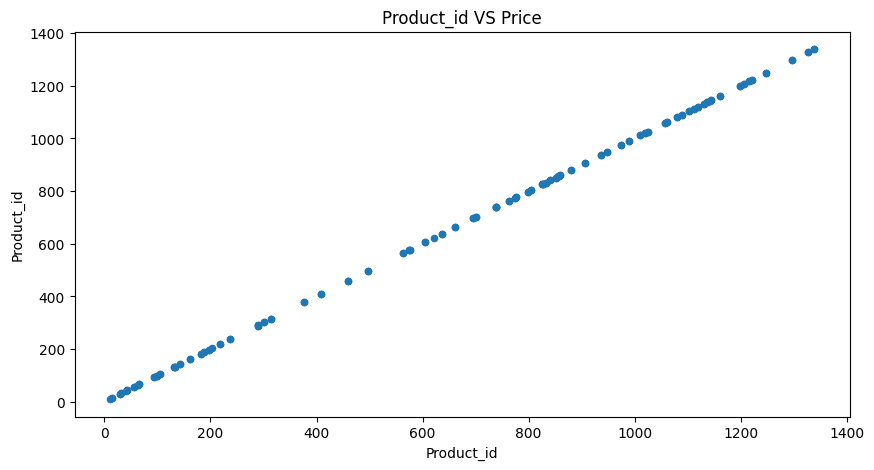

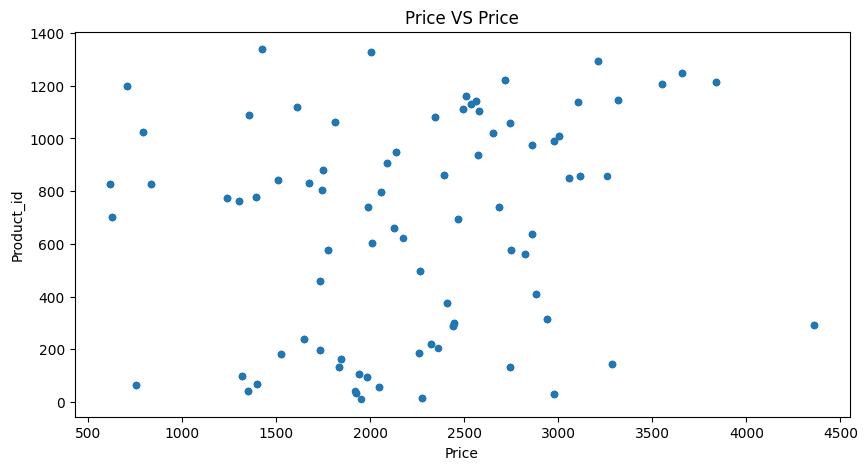

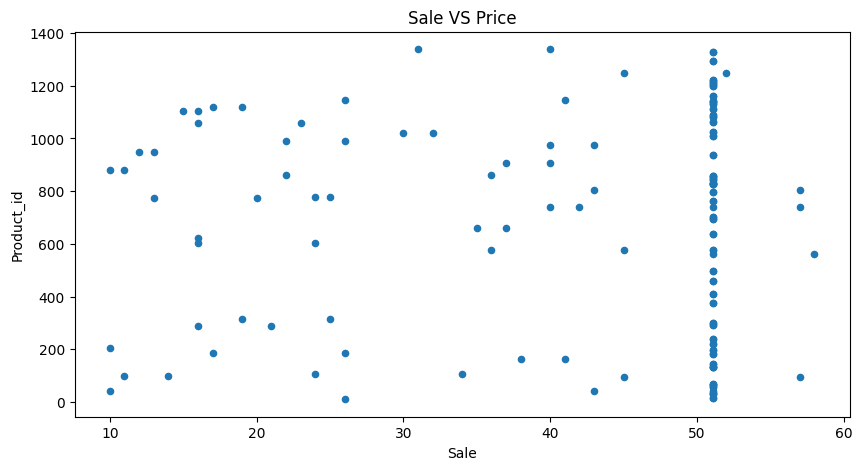

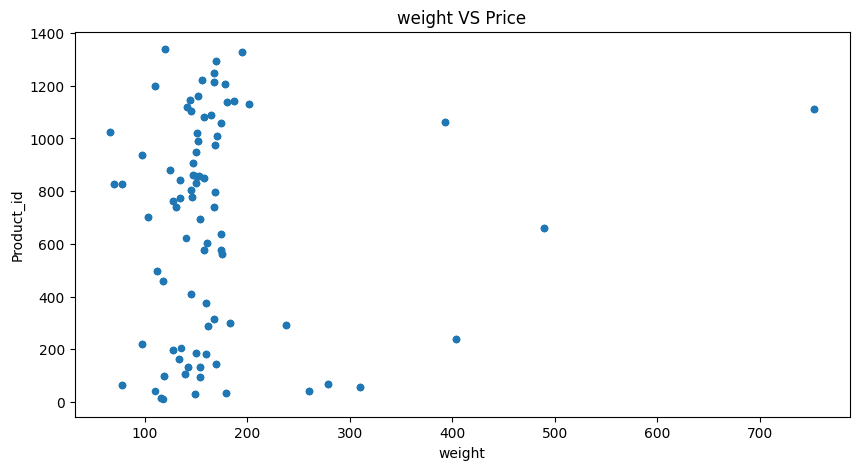

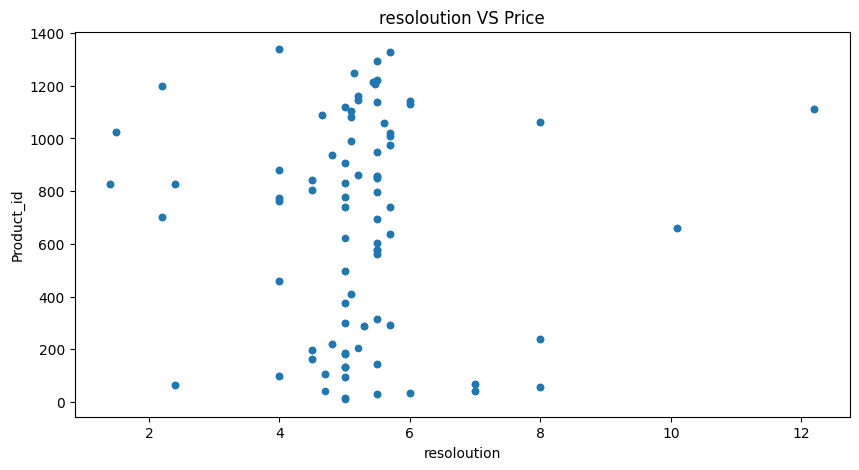

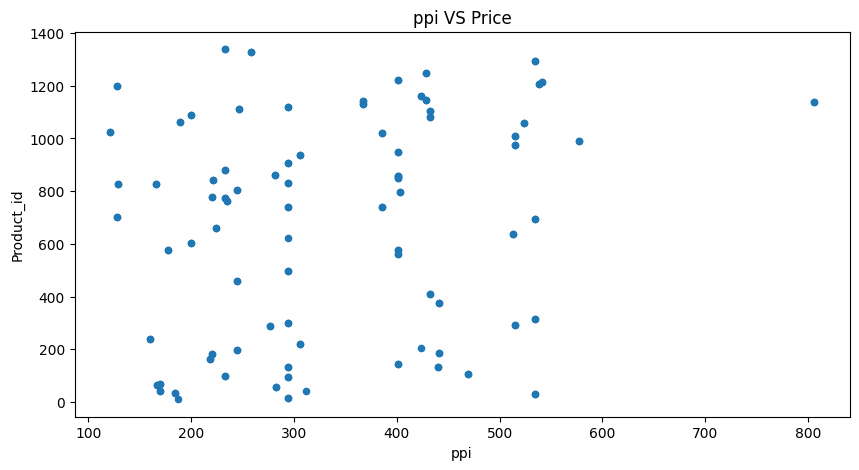

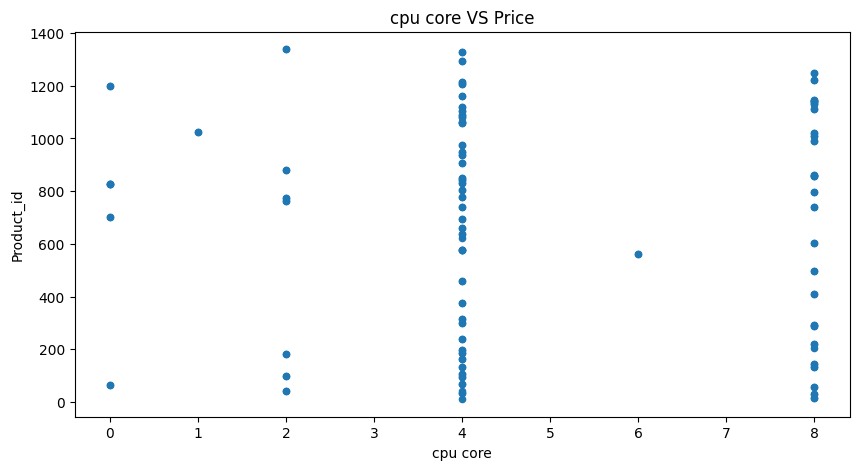

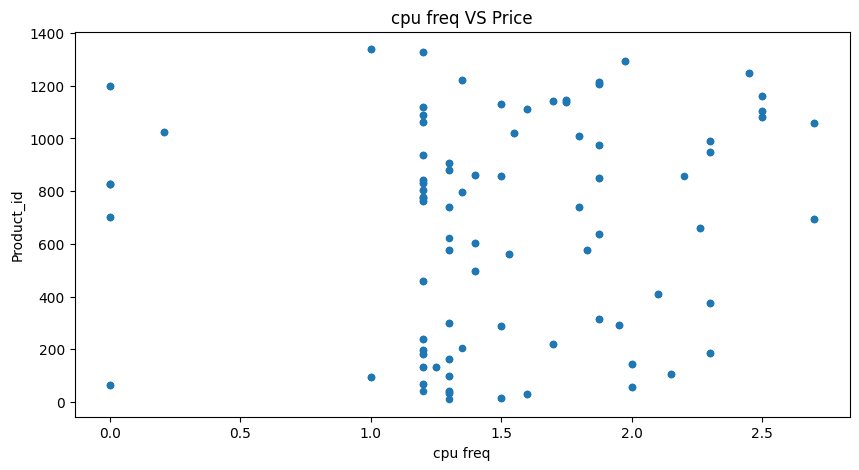

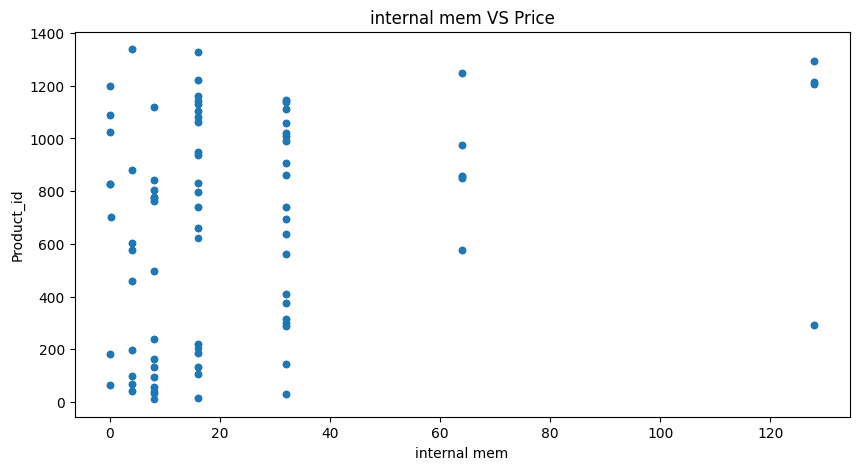

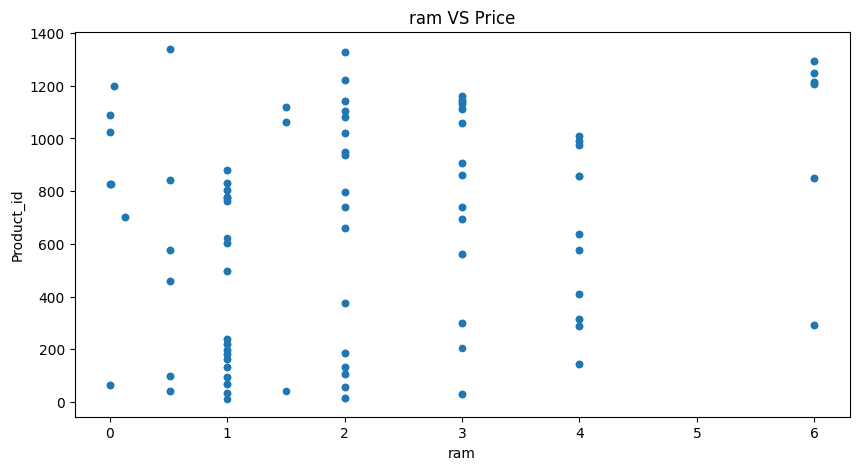

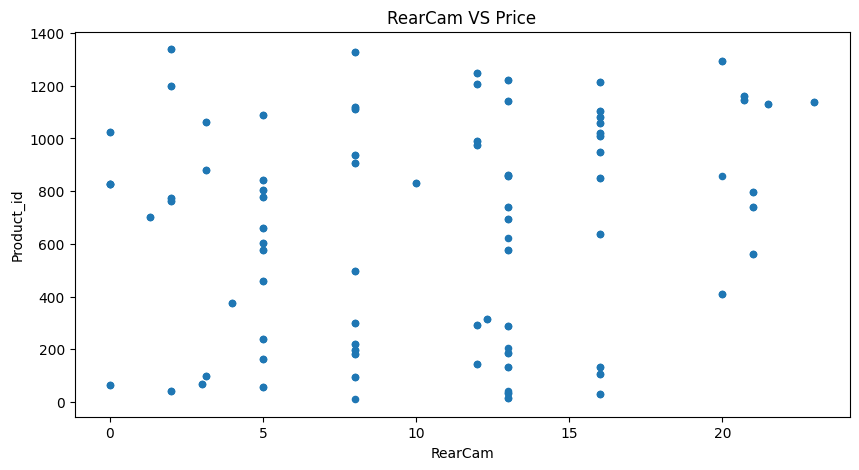

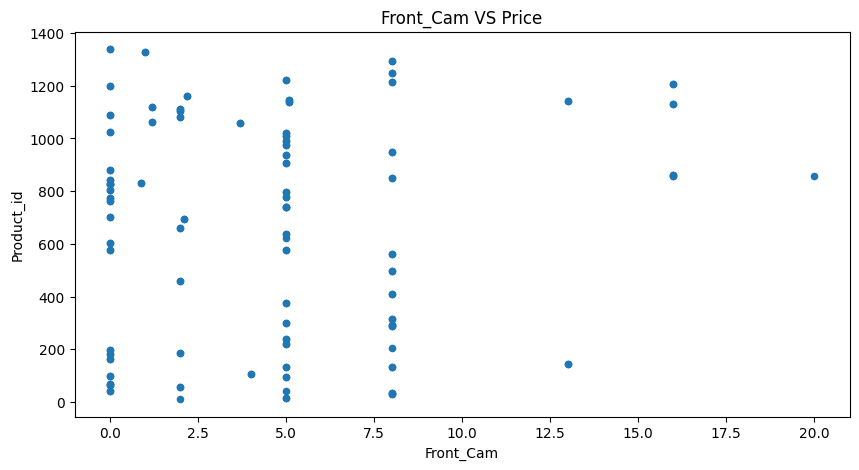

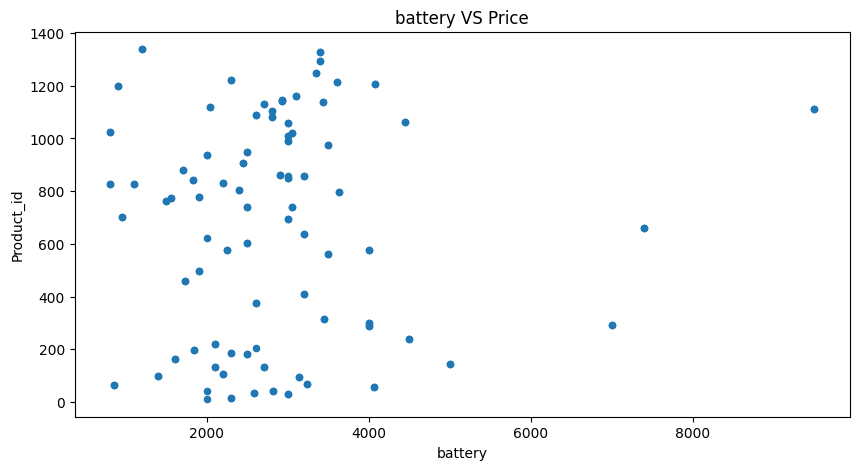

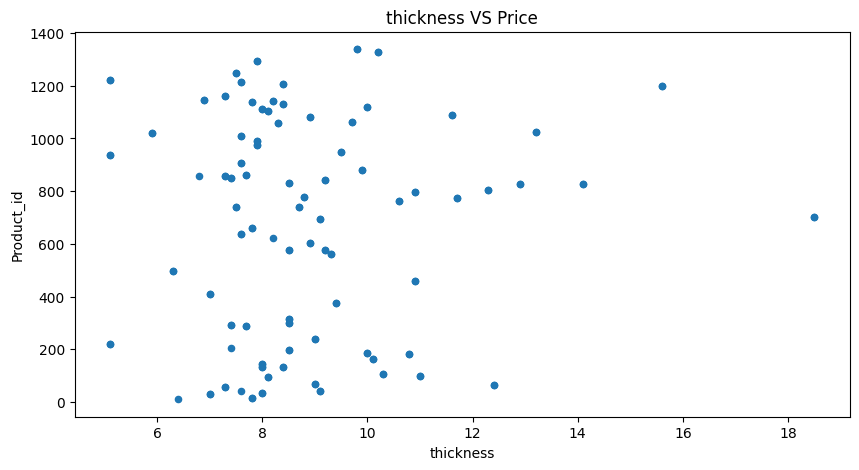

In [23]:
#Step 13 - Relationship exploration: Continuous Vs Continuous -- Scatter Charts
ContinuousCols=['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq',
                 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness']

#Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    CellphoneData.plot.scatter(x=predictor, y='Product_id', figsize=(10,5), title=predictor+" VS "+ 'Price')

In [ ]:
# Scatter charts interpretation
There is a very clear trend between the Product_id and Price. The higher the product ID is, the higher the price is as well. This is shown in the linear positive correlation which can be seen in the scatter plot "Product_id VS Price"
Other than the relationship between the Product_id and the Price there do not seem to be further trends or patterns to be found in the subsequent graphs.
There is a concentration of weight towards around 100-200 however, this does not constitute a relation and instead more likely a result of most phones being in that weight range.

In [24]:
#Step 14 Calculating correlation matrix
ContinuousCols=['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq',
                 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness']

# Creating the correlation matrix
CorrelationData=CellphoneData[ContinuousCols].corr()
CorrelationData

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
Product_id,1.000000,0.165136,0.007392,0.035869,-0.017817,0.207271,-0.008634,0.092428,0.261186,0.236194,0.172812,0.071020,0.031745,0.039807
Price,0.165136,1.000000,0.071540,0.144555,0.404010,0.817614,0.686811,0.727383,0.776738,0.896915,0.739538,0.675286,0.559946,-0.716773
Sale,0.007392,0.071540,1.000000,0.116869,0.048516,-0.019371,0.050482,-0.178906,0.154031,0.074202,0.023313,0.099932,0.139636,0.018148
weight,0.035869,0.144555,0.116869,1.000000,0.890416,-0.054683,0.216257,0.222730,0.098849,0.149283,-0.029448,-0.005971,0.833783,-0.185262
resoloution,-0.017817,0.404010,0.048516,0.890416,1.000000,0.181292,0.472226,0.505454,0.202660,0.327216,0.249892,0.202720,0.843462,-0.533708
ppi,0.207271,0.817614,-0.019371,-0.054683,0.181292,1.000000,0.487990,0.713168,0.618560,0.748724,0.774008,0.491371,0.302517,-0.496791
cpu core,-0.008634,0.686811,0.050482,0.216257,0.472226,0.487990,1.000000,0.491519,0.276251,0.483128,0.611353,0.586698,0.459728,-0.697935
cpu freq,0.092428,0.727383,-0.178906,0.222730,0.505454,0.713168,0.491519,1.000000,0.441400,0.633547,0.625104,0.358319,0.473137,-0.614458
internal mem,0.261186,0.776738,0.154031,0.098849,0.202660,0.618560,0.276251,0.441400,1.000000,0.875354,0.451917,0.555733,0.461506,-0.367412
ram,0.236194,0.896915,0.074202,0.149283,0.327216,0.748724,0.483128,0.633547,0.875354,1.000000,0.648073,0.647470,0.541001,-0.521074


In [ ]:
 #Observations from Step 14
 Price is the most correlated with RAM (0.896915), ppi (0.817614), Internal memory (0.776738), Rear camera (0.739538), and CPU frequency (0.727383) respectively.
Final selected Continuous columns: 'ram', 'internal mem','RearCam'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SyntaxError: invalid syntax (<ipython-input-48-5498bc487dc7>, line 2)

In [25]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Price'][abs(CorrelationData['Price']) > 0.5 ]

Price           1.000000
ppi             0.817614
cpu core        0.686811
cpu freq        0.727383
internal mem    0.776738
ram             0.896915
RearCam         0.739538
Front_Cam       0.675286
battery         0.559946
thickness      -0.716773
Name: Price, dtype: float64

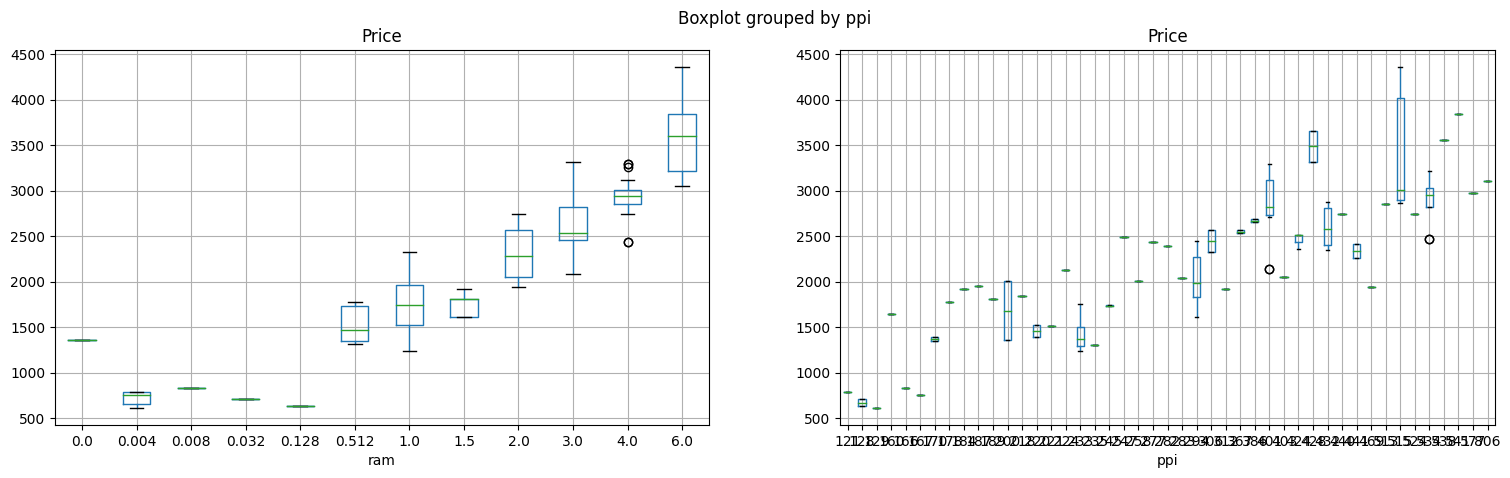

In [26]:
# Box plots for continuous Target Variable "Price" and Categorical predictors
CategoricalColsList=['ram', 'ppi']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CellphoneData.boxplot(column='Price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [58]:
There seems to be a strong correlation between the Cellphone's RAM and its price, as well as the phone's ppi and its price. As seen through the positive linear correlation amongst both graphs, the higher the RAM is
the higher the price tends to be. The sane can be seen for the ppi, as a higher ppi correlates with a higher price. We can further prove this through the ANOVA test below.

SyntaxError: invalid syntax (<ipython-input-58-61c68fa3be19>, line 1)

In [27]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [28]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['ram', 'internal mem']
FunctionAnova(inpData=CellphoneData,
              TargetVariable='Price',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

ram is correlated with Price | P-Value: 1.5941027123567347e-60
internal mem is correlated with Price | P-Value: 5.612710293590637e-57


['ram', 'internal mem']

In [ ]:
#Observations from Step 16
The results of ANOVA confirm the visual analysis in the box plots above.

All categorical variables are correlated with the Target variable.

The final selected Categorical columns are below:

In [29]:
SelectedColumns=['ram', 'ppi', 'internal mem', 'RearCam', 'cpu freq']

# Selecting final columns
DataForML=CellphoneData[SelectedColumns]
DataForML.head()

,ram,ppi,internal mem,RearCam,cpu freq
0,3.000,424,16.0,13.00,1.35
1,1.000,233,4.0,3.15,1.30
2,1.500,312,8.0,13.00,1.20
3,0.512,233,4.0,3.15,1.30
4,1.000,233,4.0,3.15,1.30


In [30]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [ ]:
#Step 17: Data Pre-processing for Machine Learning Model Building or Model Development
* List of steps that needs to be performed on predictor variables before data can be used for machine learning

* Converting each Ordinal Categorical columns to numeric
* Converting Binary nominal Categorical columns to numeric using 1/0 mapping
* Converting all other nominal categorical columns to numeric using pd.get_dummies()
* Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks
* Converting the ordinal variable to numeric - In this data there is no Ordinal categorical variable.
* Converting the binary nominal variable to numeric using 1/0 mapping: There is no binary nominal variable in string format in this data


In [31]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Price']=CellphoneData['Price']

# Printing sample rows
DataForML_Numeric.head()

,ram,ppi,internal mem,RearCam,cpu freq,Price
0,3.000,424,16.0,13.00,1.35,2357
1,1.000,233,4.0,3.15,1.30,1749
2,1.500,312,8.0,13.00,1.20,1916
3,0.512,233,4.0,3.15,1.30,1315
4,1.000,233,4.0,3.15,1.30,1749


In [32]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['ram', 'ppi', 'internal mem', 'RearCam', 'cpu freq', 'Price'], dtype='object')

In [33]:
#Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['ram', 'ppi', 'internal mem', 'RearCam', 'cpu freq']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [34]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
#Check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 5)
(112,)
(49, 5)
(49,)


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Assuming you have your dataset loaded into a DataFrame named 'CellphoneData'
# Replace the variable names and headings accordingly

# Extracting features (X) and target variable (y)
X = CellphoneData[['ram', 'ppi', 'internal mem', 'RearCam', 'cpu freq']]
y = CellphoneData['Price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Model evaluation
r2_value = r2_score(y_test, y_pred)
print("Linear Regression Model")
print("R2 Value:", r2_value)

print("\n##### Model Validation and Accuracy Calculations ##########")

# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data=X_test, columns=['ram', 'ppi', 'internal mem', 'RearCam', 'cpu freq'])
TestingDataResults['Price'] = y_test
TestingDataResults['PredictedPrice'] = np.round(y_pred)

# Calculating the error for each row
TestingDataResults['APE'] = 100 * ((abs(
    TestingDataResults['Price'] - TestingDataResults['PredictedPrice'])) / TestingDataResults['Price'])

mean_accuracy = 100 - np.mean(TestingDataResults['APE'])
median_accuracy = 100 - np.median(TestingDataResults['APE'])

print(TestingDataResults.head())

print("\nMean Accuracy on test data:", mean_accuracy)
print("Median Accuracy on test data:", median_accuracy)

# Defining a custom function to calculate accuracy
def accuracy_score(orig, pred):
    sale = np.mean(100 * (np.abs(orig - pred) / orig))
    return (100 - sale)

# Custom Scoring Sales calculation
from sklearn.metrics import make_scorer
custom_scoring = make_scorer(accuracy_score, greater_is_better=True)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
accuracy_values = cross_val_score(model, X, y, cv=10, scoring=custom_scoring)
print("\nAccuracy values for 10-fold Cross Validation:\n", accuracy_values)
print("\nFinal Average Accuracy of the model:", round(accuracy_values.mean(), 2))


Linear Regression Model
R2 Value: 0.8280185887898788

##### Model Validation and Accuracy Calculations ##########
       ram  ppi  internal mem  RearCam  cpu freq  Price  PredictedPrice  \
105  0.008  166           0.0      0.0       0.0    833           909.0   
108  1.000  294          16.0     10.0       1.2   1676          1815.0   
142  3.000  424          16.0     20.7       2.5   2508          2939.0   
55   0.512  178           4.0      5.0       1.3   1777          1513.0   
94   0.512  221           8.0      5.0       1.2   1511          1530.0   

           APE  
105   9.123649  
108   8.293556  
142  17.185008  
55   14.856500  
94    1.257445  

Mean Accuracy on test data: 88.21192563778486
Median Accuracy on test data: 88.47790507364975

Accuracy values for 10-fold Cross Validation:
 [88.8064864  87.99102775 91.16484563 92.2933604  90.02678062 90.94622333
 88.51814806 84.2340707  84.28309622 84.33252179]

Final Average Accuracy of the model: 88.26


DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9586912428485799

##### Model Validation and Accuracy Calculations ##########
       ram  ppi  internal mem  RearCam  cpu freq  Price  PredictedPrice
105  0.008  166           0.0      0.0       0.0    833           754.0
108  1.000  294          16.0     10.0       1.2   1676          1762.0
142  3.000  424          16.0     20.7       2.5   2508          2329.0
55   0.512  178           4.0      5.0       1.3   1777          1512.0
94   0.512  221           8.0      5.0       1.2   1511          1512.0
Mean Accuracy on test data: 92.45931951045705
Median Accuracy on test data: 92.95261239368165

Accuracy values for 10-fold Cross Validation:
 [90.05378015 92.48915025 92.63798356 89.53786187 91.95667089 83.02767965
 89.32475322 81.18985367 84.18567205 86.6193777 ]

Final Average Accuracy of the model: 88.1


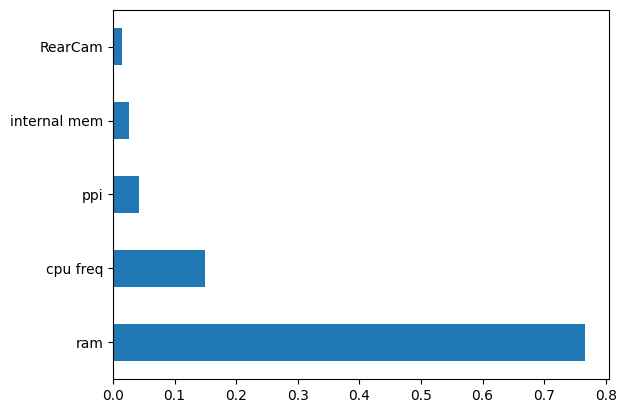

In [37]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Decision Trees (Multiple if-else statements!)
RegModel = DecisionTreeRegressor(max_depth=5, criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT = RegModel.fit(X_train, y_train)
prediction = DT.predict(X_test)

# Measuring Goodness of fit in Training data
print('R2 Value:', r2_score(y_train, DT.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults['Predicted' + TargetVariable] = np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Calculating the error for each row
TestingDataResults['APE'] = 100 * ((abs(
    TestingDataResults[TargetVariable] - TestingDataResults['Predicted' + TargetVariable])) / TestingDataResults[TargetVariable])

MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy)  # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    # print('#'*70,'Accuracy:', 100-MAPE)
    return (100 - MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


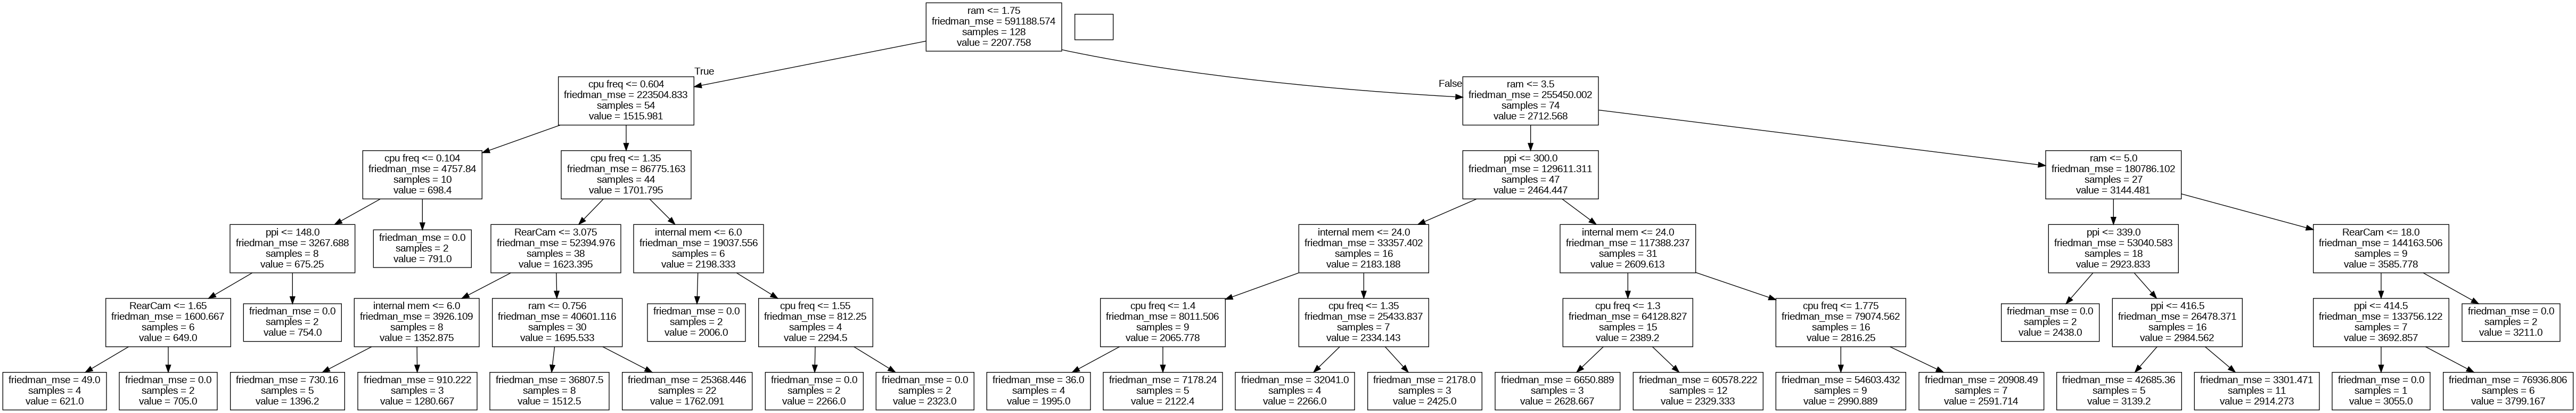

In [38]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.9576679951380868

##### Model Validation and Accuracy Calculations ##########
       ram  ppi  internal mem  RearCam  cpu freq  Price  PredictedPrice
105  0.008  166           0.0      0.0       0.0    833           738.0
108  1.000  294          16.0     10.0       1.2   1676          1909.0
142  3.000  424          16.0     20.7       2.5   2508          2552.0
55   0.512  178           4.0      5.0       1.3   1777          1662.0
94   0.512  221           8.0      5.0       1.2   1511          1617.0
Mean Accuracy on test data: 88.21192563778486
Median Accuracy on test data: 88.47790507364975

Accuracy values for 10-fold Cross Validation:
 [90.23698997 91.33031711 91.51347167 92.13604141 92.79779555 90.72681155
 91.02775472 88.12028062 88.26467827 87.23950811]

Final Average Accuracy of the model: 90.34


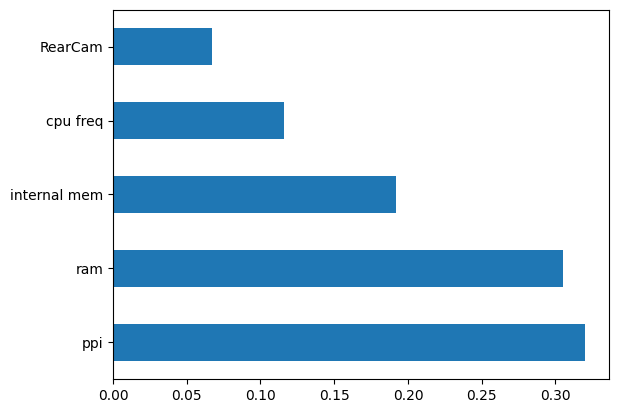

In [39]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

TestingDataResults['Price'] = y_test
TestingDataResults['PredictedPrice'] = np.round(y_pred)

# Calculating the error for each row
TestingDataResults['APE'] = 100 * ((abs(
    TestingDataResults['Price'] - TestingDataResults['PredictedPrice'])) / TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

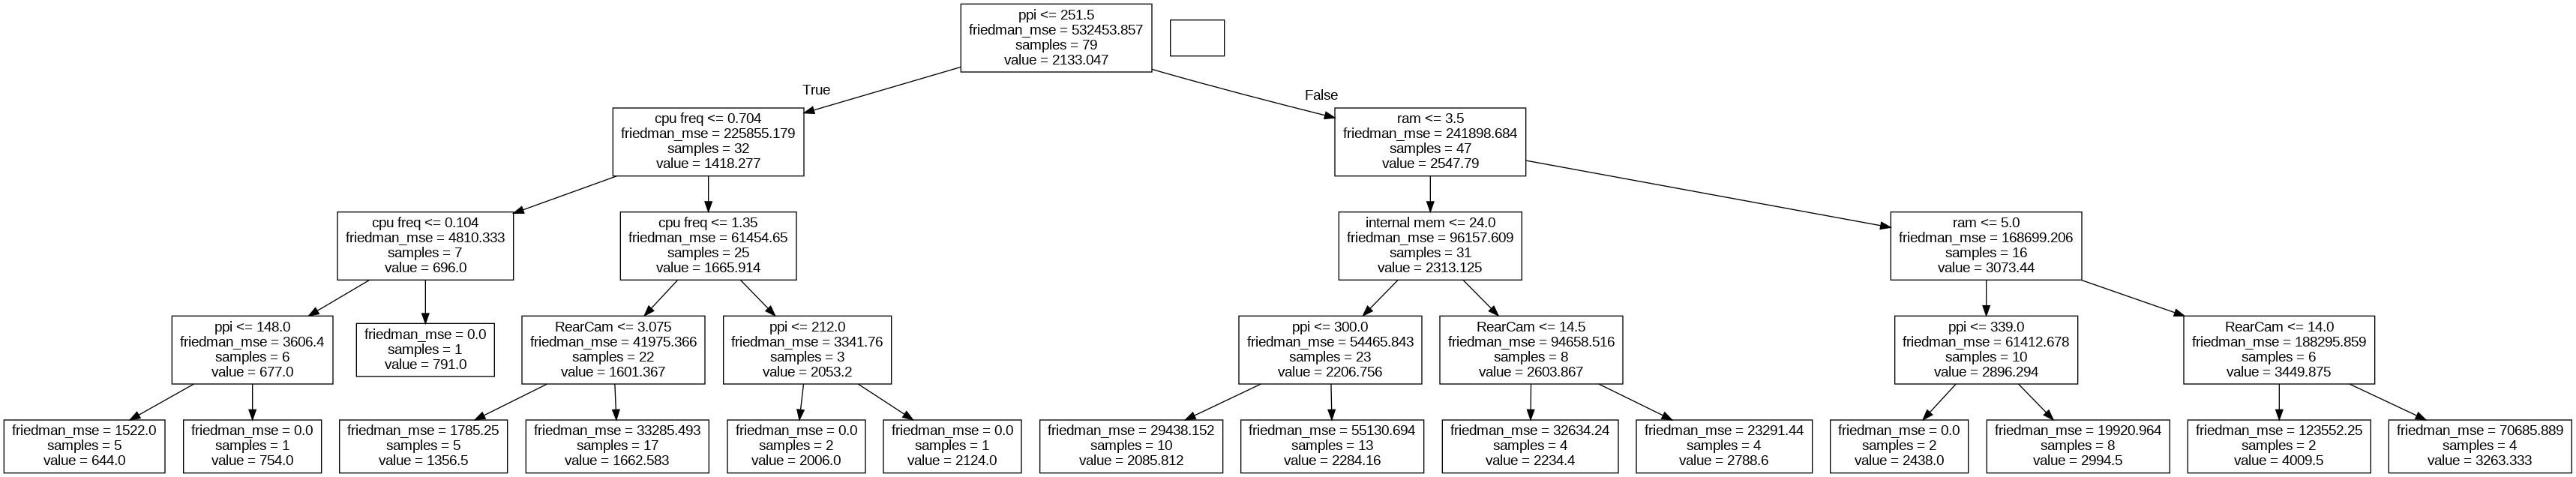

In [40]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Creating DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.9394705302364671

##### Model Validation and Accuracy Calculations ##########
       ram  ppi  internal mem  RearCam  cpu freq  Price  PredictedPrice
105  0.008  166           0.0      0.0       0.0    833           702.0
108  1.000  294          16.0     10.0       1.2   1676          1863.0
142  3.000  424          16.0     20.7       2.5   2508          2436.0
55   0.512  178           4.0      5.0       1.3   1777          1669.0
94   0.512  221           8.0      5.0       1.2   1511          1669.0
Mean Accuracy on test data: 88.21192563778486
Median Accuracy on test data: 88.47790507364975

Accuracy values for 10-fold Cross Validation:
 [88.75591567 90.42432396 89.98868227 90.58173396 92.57291213 91.32490212
 89.11479873 92.33647855 84.6135501  86.64859254]

Final Average Accuracy of the model: 89.64


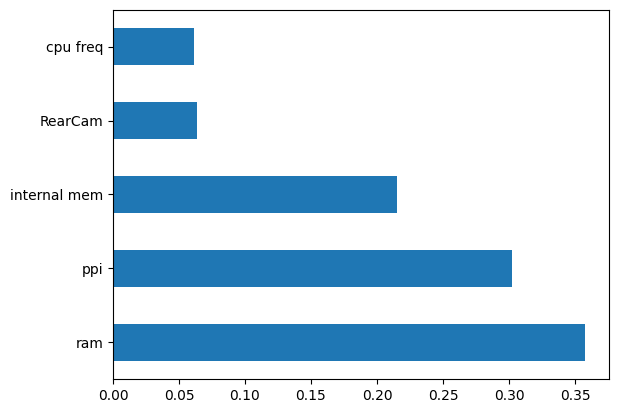

In [41]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

TestingDataResults['Price'] = y_test
TestingDataResults['PredictedPrice'] = np.round(y_pred)

# Calculating the error for each row
TestingDataResults['APE'] = 100 * ((abs(
    TestingDataResults['Price'] - TestingDataResults['PredictedPrice'])) / TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.99669569868225

##### Model Validation and Accuracy Calculations ##########
       ram  ppi  internal mem  RearCam  cpu freq  Price  PredictedPrice
105  0.008  166           0.0      0.0       0.0    833           651.0
108  1.000  294 

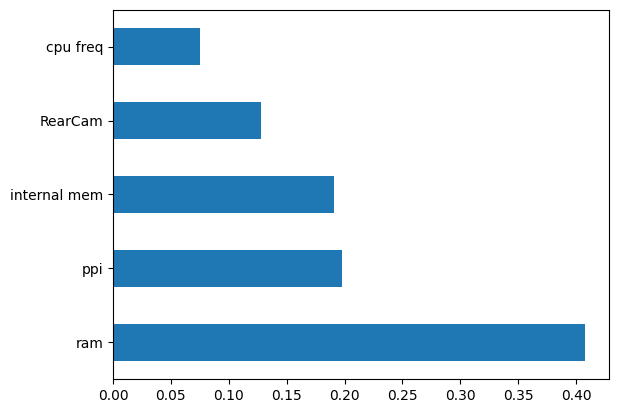

In [42]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

TestingDataResults['Price'] = y_test
TestingDataResults['PredictedPrice'] = np.round(y_pred)

# Calculating the error for each row
TestingDataResults['APE'] = 100 * ((abs(
    TestingDataResults['Price'] - TestingDataResults['PredictedPrice'])) / TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

<Axes: >

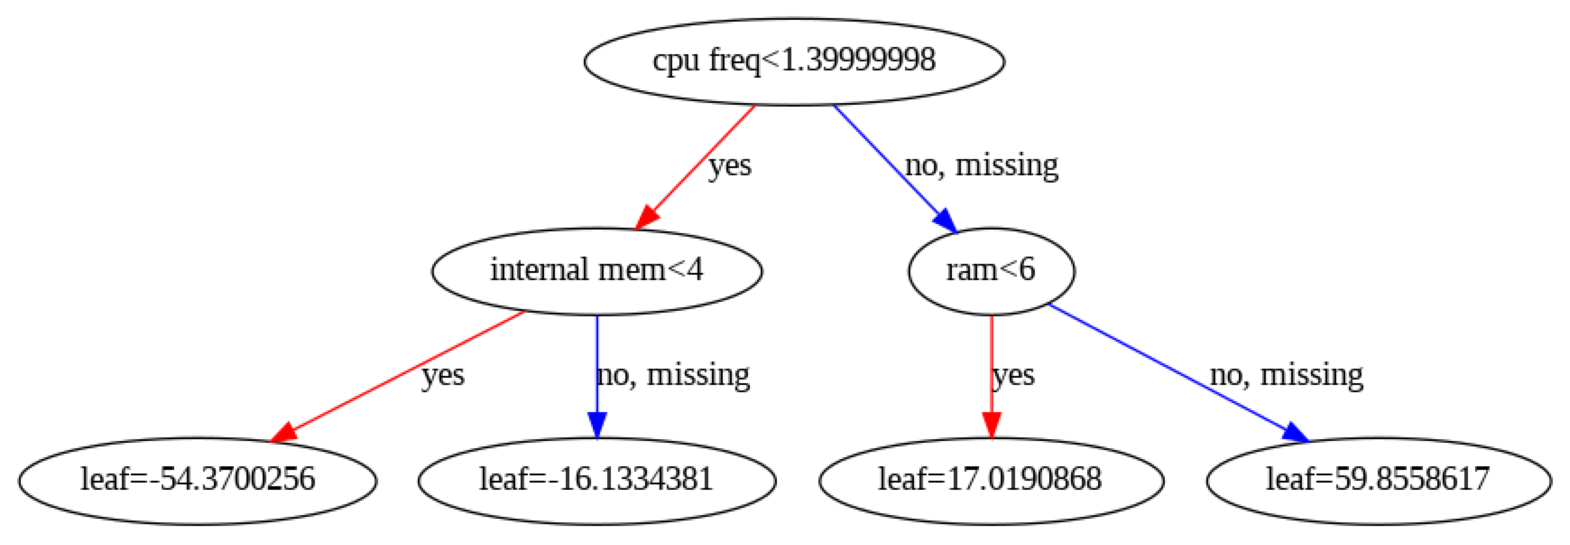

In [43]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

In [44]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

TestingDataResults['Price'] = y_test
TestingDataResults['PredictedPrice'] = np.round(y_pred)

# Calculating the error for each row
TestingDataResults['APE'] = 100 * ((abs(
    TestingDataResults['Price'] - TestingDataResults['PredictedPrice'])) / TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9554825065006697

##### Model Validation and Accuracy Calculations ##########
       ram  ppi  internal mem  RearCam  cpu freq  Price  PredictedPrice
105  0.008  166           0.0      0.0       0.0    833           952.0
108  1.000  294          16.0     10.0       1.2   1676          1885.0
142  3.000  424          16.0     20.7       2.5   2508          2427.0
55   0.512  178           4.0      5.0       1.3   1777          1523.0
94   0.512  221           8.0      5.0       1.2   1511          1430.0
Mean Accuracy on test data: 88.21192563778486
Median Accuracy on test data: 88.47790507364975

Accuracy values for 10-fold Cross Validation:
 [88.63827391 88.85546402 86.87317238 92.22554485 88.95629115 91.10780449
 83.76827557 87.26833673 86.33621764 92.97740285]

Final Average Accuracy of the model: 88.7


In [45]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

TestingDataResults['Price'] = y_test
TestingDataResults['PredictedPrice'] = np.round(y_pred)

# Calculating the error for each row
TestingDataResults['APE'] = 100 * ((abs(
    TestingDataResults['Price'] - TestingDataResults['PredictedPrice'])) / TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])


Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.3999552816545707

##### Model Validation and Accuracy Calculations ##########
       ram  ppi  internal mem  RearCam  cpu freq  Price  PredictedPrice
105  0.008  166           0.0      0.0       0.0    833          2003.0
108  1.000  294          16.0     10.0       1.2   1676          2101.0
142  3.000  424          16.0     20.7       2.5   2508          2287.0
55   0.512  178           4.0      5.0       1.3   1777          2037.0
94   0.512  221           8.0      5.0       1.2   1511          1911.0
Mean Accuracy on test data: 88.21192563778486
Median Accuracy on test data: 88.47790507364975

Accuracy values for 10-fold Cross Validation:
 [83.24941951 80.86636946 87.5360599  81.1531094  84.88960895 54.8083394
 55.29929251 55.20027673 59.43409469 48.15991707]

Final Average Accuracy of the model: 69.06


In [50]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['ram', 'ppi', 'cpu freq']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(161, 3)
(161,)


In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choosing from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [89.62025546 91.58247918 90.52023545 92.11854969 79.78948728 80.97326926
 89.23178612 88.20097349 86.19361502 90.88833102]

Final Average Accuracy of the model: 87.91


In [ ]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Closing filestream
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content/drive/MyDrive/Capstone/Cellphone


In [51]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['ram', 'ppi', 'cpu freq']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

In [52]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[4.98,6.575,15.3],[4.98,3.2,10.3]],columns=['ram', 'ppi', 'cpu freq'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

    ram    ppi  cpu freq
0  4.98  6.575      15.3
1  4.98  3.200      10.3


,Prediction
0,2470.791992
1,2470.791992


In [53]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_ram , inp_ppi, inp_cpu_freq):

    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_ram , inp_ppi, inp_cpu_freq]],
     columns=['ram', 'ppi', 'cpu freq'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction( inp_ram=4.98,
                           inp_ppi=6.5,
                           inp_cpu_freq=15.3
                             )

'{"Prediction":{"0":2470.7919921875}}'

In [54]:
!pip install flask

In [55]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [56]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the parameters from API call
        ram_value = float(request.args.get('ram'))
        ppi_value = float(request.args.get('ppi '))
        cpu_freq_value = float(request.args.get('cpu freq'))

        # Calling the function to get predictions
        prediction_from_api = FunctionGeneratePrediction(
            inp_ram=ram_value,
            inp_ppi=ppi_value,
            inp_cpu_freq=cpu_freq_value
        )

        return str(prediction_from_api)

    except Exception as e:
        return 'Something is not right!: ' + str(e)


In [57]:
import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:9000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
'''
Sample URL to call the API
Copy and paste below URL in the web browser
http://127.0.0.1:9000/prediction_api?LSTAT=4.9&RM=6.5&PTRATIO=15.3
'''

'\nSample URL to call the API\nCopy and paste below URL in the web browser\nhttp://127.0.0.1:9000/prediction_api?LSTAT=4.9&RM=6.5&PTRATIO=15.3\n'

In [ ]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

class MobilePricePredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Mobile Price Prediction')
        self.data = pd.read_csv(r#'C:\Users\Kasra\Desktop\Capstone\Cellphone.csv')  # Use raw string or double backslashes
        self.sliders = []

        self.X = self.data.drop('Price', axis=1).values
        self.y = self.data['Price'].values

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        self.model = XGBRegressor()
        self.model.fit(self.X_train, self.y_train)

        self.create_widgets()

    def create_widgets(self):
        for i, column in enumerate(self.data.columns[:-1]):
            label = tk.Label(self.master, text=column + ': ')
            label.grid(row=i, column=0)
            current_val_label = tk.Label(self.master, text='0.0')
            current_val_label.grid(row=i, column=2)
            slider = ttk.Scale(self.master, from_=self.data[column].min(), to=self.data[column].max(), orient="horizontal",
                               command=lambda val, label=current_val_label: label.config(text=f'{float(val):.2f}'))
            slider.grid(row=i, column=1)
            self.sliders.append((slider, current_val_label))

        predict_button = tk.Button(self.master, text='Predict Price', command=self.predict_price)
        predict_button.grid(row=len(self.data.columns[:-1]), columnspan=3)

    def predict_price(self):
        inputs = [float(slider.get()) for slider, _ in self.sliders]
        price = self.model.predict([inputs])
        messagebox.showinfo('Predicted Price', f'The predicted cellphone price is ${price[0]:.2f}')

if __name__ == '__main__':
    root = tk.Tk()
    app = MobilePricePredictionApp(root)
    root.mainloop()


TclError: no display name and no $DISPLAY environment variable